# Creating Protein Meshes in Graphein & 3D Visualisation

Graphein provides functionality to create meshes of protein surfaces. The mesh computation is handled under the hood by PyMol to produce `.obj` files, which are handled by many geometric analysis libraries (such as [PyTorch3D](https://pytorch3d.org/)). We'll create a few protein meshes, convert them to PyTorch3D objects and visualise them. Again, there is a high-level and low-level API for convenience. We'll be looking at PDB [1LDF](https://www.rcsb.org/structure/1ldf), an elegant structure of the E. col glycerol uptake facilitator protein.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/protein_mesh_tutorial.ipynb)

**NB** lots of features of PyTorch3D are GPU only. If on macOS (only!), you can install via pip. Ensure you have PyTorch `1.9.0`. This is the only supported configuration. See: https://github.com/facebookresearch/pytorch3d/blob/main/INSTALL.md

In [1]:
# Install Graphein if necessary
# !pip install graphein

# Install pymol if necessary - in this tutorial PyMol is only used for the initial plot. Feel free to skip!
# sudo apt-get install pymol (recommended for colab) OR conda install -c schrodinger pymol

In [2]:
# Install torch 1.9.0
# pip install torch==1.9.0

# Install pytorch3d
# pip install pytorch3d

In [3]:
# NBVAL_SKIP
%matplotlib inline
import logging
logging.basicConfig(level=logging.CRITICAL)

## High-level API
### Config
Again, we use a [ProteinMeshConfig](https://graphein.ai/modules/graphein.protein.html#graphein.protein.config.ProteinMeshConfig) config object to manage global configurations.

* `pymol_command_line_options`: String of additional pymol command line options when launching. A full list can be found [here](https://www.pymolwiki.org/index.php/Command_Line_Options). The default options, `"-cKq"`, do:
   * `c`: launch in command-line only mode for batch processing
   * `K`: keep alive: when running without a GUI, don't quit after the input
            is exhausted
    * `q`: supress startup message 
    
* `pymol_commands` : List of string pymol commands to execute. You can use these to configure the exact mesh you wish to construct. A reference to these can be found [here](https://pymol.org/pymol-command-ref.html)

In [4]:
from graphein.protein.config import ProteinMeshConfig
config = ProteinMeshConfig()
config.dict()

{'pymol_command_line_options': '-cKq', 'pymol_commands': ['show surface']}

### Building a mesh

Let's build a mesh!

In [5]:
# NBVAL_SKIP
from graphein.protein.meshes import create_mesh

verts, faces, aux = create_mesh(pdb_code="1ldf", config=config)
print(verts, faces, aux)

A PyMOL RPC server is already running.
['show surface']


tensor([[ 18.2783, -11.1472,  -7.4127],
        [ 18.2783, -11.1472,  -7.4127],
        [ 18.2783, -11.1472,  -7.4127],
        ...,
        [ -9.5277, -18.5192,   0.2442],
        [ -9.5277, -18.5192,   0.2442],
        [-10.3366, -18.0868,  -0.5147]]) Faces(verts_idx=tensor([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    8,    7],
        ...,
        [6516, 6518, 6517],
        [6519, 6521, 6520],
        [6522, 6524, 6523]]), normals_idx=tensor([[  -1,   -1,   -1],
        [  -1,   -1,   -1],
        [   0,    2,    1],
        ...,
        [6510, 6512, 6511],
        [6513, 6515, 6514],
        [6516, 6518, 6517]]), textures_idx=tensor([[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]]), materials_idx=tensor([-1, -1, -1,  ..., -1, -1, -1])) Properties(normals=tensor([[-0.6557, -0.6884, -0.3100],
        [-0.6557, -0.6884, -0.3100],
        [-0.6557, -0.6884, -0.3100],
        

In order to visualise these tensors containing vertices, faces and aux data, we convert them into a PyTorch3D `Mesh` object

/Users/arianjamasb/github/graphein/graphein/protein/visualisation.py:63: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Axes3D:title={'center':'my first mesh'}, xlabel='x', ylabel='z'>

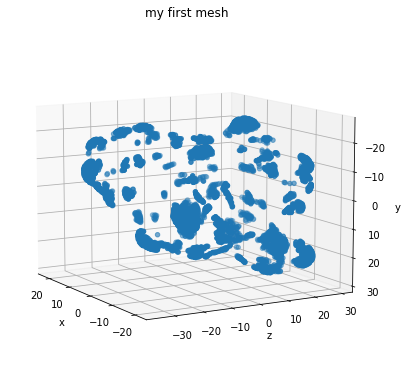

In [6]:
# NBVAL_SKIP
from graphein.protein.meshes import convert_verts_and_face_to_mesh
m = convert_verts_and_face_to_mesh(verts, faces)

from graphein.protein.visualisation import plot_pointcloud
plot_pointcloud(m, title="my first mesh")

## Modifying Mesh Parameters

Let's see what happens if we play around with some of the parameters and make a smoother mesh using

A PyMOL RPC server is already running.
['hide cartoon', 'set solvent_radius, 10', 'alter all, vdw=4', 'sort', 'set surface_quality, 1', 'show surface']


/Users/arianjamasb/github/graphein/graphein/protein/visualisation.py:63: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Axes3D:title={'center':'my second mesh'}, xlabel='x', ylabel='z'>

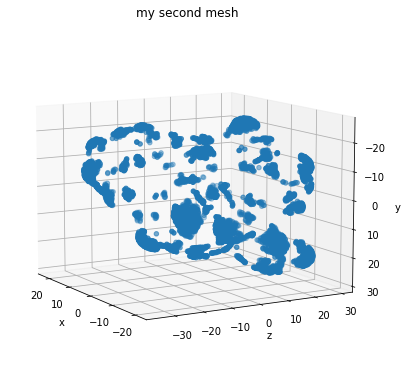

In [7]:
# NBVAL_SKIP
pymol_commands = {"pymol_commands": ["hide cartoon",
                                     "set solvent_radius, 10",
                                     "alter all, vdw=4",
                                     "sort",
                                     "set surface_quality, 1",
                                     "show surface"]}

config = ProteinMeshConfig(**pymol_commands)

verts, faces, aux = create_mesh(pdb_code="1ldf", config=config)

m = convert_verts_and_face_to_mesh(verts, faces)

plot_pointcloud(m, title="my second mesh")

## Using PyMol for 3D Visualisation
We also provide a wrapper for pymol (based on [IPyMol](https://github.com/cxhernandez/ipymol) developed by [@cxhernandez](https://github.com/cxhernandez))

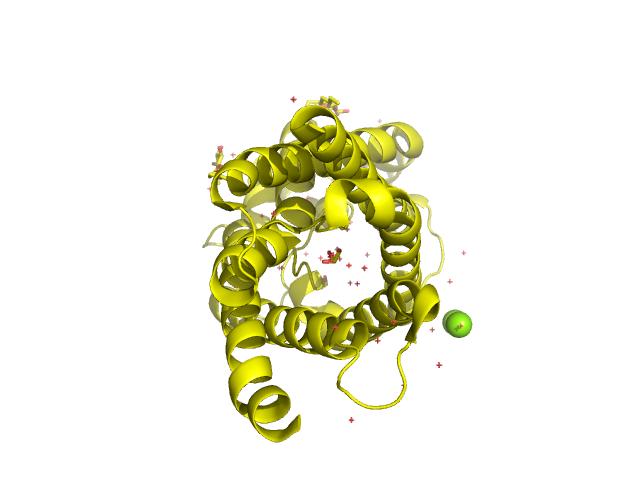

In [8]:
# NBVAL_SKIP
from graphein.utils.pymol import viewer as pymol
pymol.delete("all") # delete all objects from other sessions if necessary.
pymol.fetch("1ldf")
pymol.display()
